# Oefening 2 dubbele integralen in poolcoördinaten

Deel 1: bereken de oppervlakte van de elliptische schijf met vergelijking $x^2 + (\frac{y}{2})^2 = 1$ met centraal een cirkelvormige opening met straal $\frac{1}{2}$.  


In [1]:
# importeer alles uit sympy
from sympy import *
%matplotlib notebook 

Maak een grafiek van de impliciet gedefinieerde functies die de grenzen van de schijf beschrijven. Merk op dat een cirkel met straal $R=\frac{1}{2}$ en centrum in de oorsprong beschreven wordt met de vergelijking (impliciete functie) $x^2 + y^2 = (\frac{1}{2})^2$ 

<IPython.core.display.Javascript object>


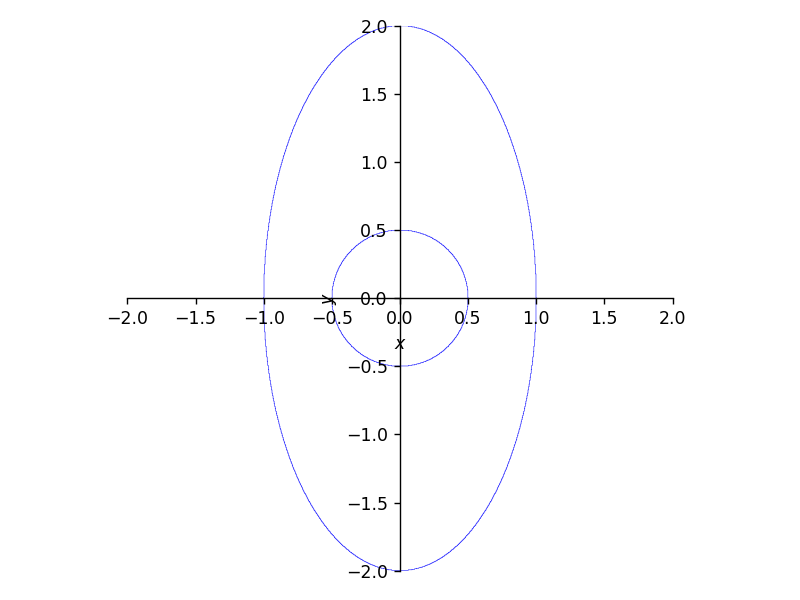

In [2]:
x,y = symbols('x y')

ellips=Eq(x**2 + (y/2)**2,1)
cirkel=Eq(x**2 + y**2,1/4)

plot1=plot_implicit(ellips,(x,-2,2),(y,-2,2),aspect_ratio=(1,1),show=False)
plot2=plot_implicit(cirkel,(x,-2,2),(y,-2,2),aspect_ratio=(1,1),show=False)

plot1.append(plot2[0])
plot1
plot1.show()

Merk op dat het gebied enkelvoudig is t.o.v. de poolhoek $\theta$ (als met $\theta$ vast houdt en $r$ laat veranderen dan worden de grenzen maximaal 2 keer gesneden. Let op: het gebied is NIET enkelvoudig t.o.v. $r$ (als men $r$ vast houdt en men laat 
$\theta$ veranderen dan is het mogelijk dat de grenzen meer dan 2 keer gesneden worden (hier zelfs 4 keer...). 

Dus: eerst naar $r$ integreren, dan pas naar $\theta$. 

De grenzen voor $\theta$ zijn $0$ en $2\pi$.

De ondergrens voor $r$ is de straal van de cirkelvormige holte: $r=\frac{1}{2}$ 
De bovengrens voor $r$ kan men vinden door $r$ als functie van $\theta$ te schrijven met $x=r\cos(\theta)$ en $y=r\sin(\theta)$

In [3]:
ellips = x**2 + (y/2)**2 - 1
print(ellips)
ellips.doit()

x**2 + y**2/4 - 1


x**2 + y**2/4 - 1

In [4]:
r, theta = symbols('r theta')
poolellips = ellips.subs([(x,r*cos(theta)),(y,r*sin(theta))])
print(poolellips)
poolellips.doit()

r**2*sin(theta)**2/4 + r**2*cos(theta)**2 - 1


r**2*sin(theta)**2/4 + r**2*cos(theta)**2 - 1

In [5]:
rgrens=solve(poolellips,r)
rgrens

[-2*sqrt(-1/(3*sin(theta)**2 - 4)), 2*sqrt(1/(4 - 3*sin(theta)**2))]

De vergelijking heeft zuiver algebraïsch twee oplossingen. Maar, de poolcoördinaat $r$ is nooit negatief, de eerste oplossing heeft dus meetkundig gezien hier geen betekenis. We pikken de positieve oplossing eruit. 

In [6]:
rgrens=rgrens[1]
rgrens


2*sqrt(1/(4 - 3*sin(theta)**2))

Nu kunnen we de dubbelintegraal berekenen die de oppervlakte geeft.

In [7]:
A=Integral(r,(r,1/2,rgrens),(theta,0,2*pi))
A

Integral(r, (r, 0.5, 2*sqrt(1/(4 - 3*sin(theta)**2))), (theta, 0, 2*pi))

In [8]:
A.doit()

1.75*pi

Men kan ook gebruik maken van de eigenschap "opsplitsen van het integratiegebied" en eerst de oppervlakte van de schijf zonder de opening berekenen, dan de oppervlakte van de opening berekenen en het verschil nemen.

In [9]:
Alternatief=Integral(r,(r,0,rgrens),(theta,0,2*pi))-Integral(r,(r,0,1/2),(theta,0,2*pi))
Alternatief

-Integral(r, (r, 0, 0.5), (theta, 0, 2*pi)) + Integral(r, (r, 0, 2*sqrt(1/(4 - 3*sin(theta)**2))), (theta, 0, 2*pi))

In [10]:
oppervlakte=Alternatief.doit()
oppervlakte

1.75*pi

Bij de berekening van de integraal wordt $\frac{1}{2}$ voorgesteld als $0.5$, hierdoor krijg je een decimale uitkomst.
Je kan forceren dat hier expliciet met de breuk wordt gerekend.

In [11]:
from fractions import Fraction
A=Integral(r,(r,Fraction(1,2),rgrens),(theta,0,2*pi))
A

Integral(r, (r, 1/2, 2*sqrt(1/(4 - 3*sin(theta)**2))), (theta, 0, 2*pi))

In [12]:
A.doit()

7*pi/4


Deel 2: bereken de totale elektrische lading op de schijf als de oppervlakteladingsdichtheid gegeven wordt door
$\sigma(r,\theta)=\frac{1}{100}(\cos(\theta))^2$


In [13]:
sigma = Symbol('sigma')
#sigma = (1/100)*(cos(theta))**2
sigma = ((cos(theta))**2)/100
sigma

cos(theta)**2/100

In [14]:
# Vergeet de Jacobiaan niet!!!
lading=Integral(sigma*r,(r,Fraction(1,2),rgrens),(theta,0,2*pi))
lading

Integral(r*cos(theta)**2/100, (r, 1/2, 2*sqrt(1/(4 - 3*sin(theta)**2))), (theta, 0, 2*pi))

In [15]:
lading=lading.doit()
lading

13*pi/2400

In [16]:
# Je bekomt een decimaal resultaat als volgt:

In [17]:
N(lading)

0.0170169602069447